# Ejercicio Formativo 1 Capítulo 2

Diego nicolás Herrera González

diego.herrerag00@uc.cl

# Carga de datos 

In [3]:
import pandas as pd

df = pd.read_csv("E1_data.csv")

df

,X,Y,Set
0,8,6.58,A
1,8,5.76,A
2,8,7.71,A
3,8,8.84,A
4,8,8.47,A
5,8,7.04,A
6,8,5.25,A
7,19,12.50,A
8,8,5.56,A
9,8,7.91,A


In [4]:
# Primero, vemos si existen valores nulos en el DataFrame.
df.isnull().sum()

X      0
Y      0
Set    0
dtype: int64

Dado que no existen valores nulos, los datos están limpios, por lo tanto, seguimos.

# Cálculo de Metrícas

Una de las primeras metricas interesantes es ver los estadisticos de los valores numericos, que en este caso, serían de la columna X e Y.

In [5]:
df.describe()

,X,Y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


Ahora bien, lo veremos para cada uno de los valores de la columna `Set`, como nos dice el enunciado. Primero, veremos que valores tiene la columna Set. 

In [6]:
df["Set"].value_counts()

Set
A    11
B    11
C    11
D    11
Name: count, dtype: int64

Como podemos ver, solo tiene valores A,B,C,D, cada una 11 veces. 

Lo siguiente a realizar, es ver los estadisticos que entregan los datos de las Columnas 'X' e 'Y' para cada valor que tiene la columna 'Set': A, B, C, D. 

Para ello, es necesario utilizar el metodo correspondiente para cada estadistico, y para que este ordenado según los distintos valores de la columna ´Set´, usaremos el metodo `groupby()`. 

In [7]:
# Promedio

print(df.groupby('Set')[['X', 'Y']].mean())

       X         Y
Set               
A    9.0  7.500909
B    9.0  7.500909
C    9.0  7.500000
D    9.0  7.500909


In [8]:
#Desviación Estandar

print(df.groupby('Set')[['X', 'Y']].std())

            X         Y
Set                    
A    3.316625  2.030579
B    3.316625  2.031657
C    3.316625  2.030424
D    3.316625  2.031568


In [9]:
#Valor máximo
print(df.groupby('Set')[['X','Y']].max())

      X      Y
Set           
A    19  12.50
B    14   9.26
C    14  12.74
D    14  10.84


In [10]:
# Valor minimo
print(df.groupby('Set')[['X','Y']].min())

     X     Y
Set         
A    8  5.25
B    4  3.10
C    4  5.39
D    4  4.26


In [11]:
# Correlación entre los varoles de X e Y, para ver, como su nombre lo indica, que tan correlacionados están
print(df.groupby('Set')[['X', 'Y']].corr())

              X         Y
Set                      
A   X  1.000000  0.816521
    Y  0.816521  1.000000
B   X  1.000000  0.816237
    Y  0.816237  1.000000
C   X  1.000000  0.816287
    Y  0.816287  1.000000
D   X  1.000000  0.816421
    Y  0.816421  1.000000


¿Como hacerlo todo esto de forma más sencilla? -> Creando otro data frame, pero agrupado.

In [12]:
df_agrupado = df.groupby('Set')
df_agrupado

In [13]:
df_agrupado.describe()

X                                               Y                      \
    count mean       std  min  25%  50%   75%   max count      mean       std   
Set                                                                             
A    11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909  2.030579   
B    11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909  2.031657   
C    11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000  2.030424   
D    11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909  2.031568   

                                     
      min    25%   50%   75%    max  
Set                                  
A    5.25  6.170  7.04  8.19  12.50  
B    3.10  6.695  8.14  8.95   9.26  
C    5.39  6.250  7.11  7.98  12.74  
D    4.26  6.315  7.58  8.57  10.84

In [14]:
df_agrupado

In [18]:
for name, group in df_agrupado:
    print(f"Name: {name}")
    print(f"Group: {group['X']}")
    print(f"Group: {group['Y']}")

Name: A
Group: 0      8
1      8
2      8
3      8
4      8
5      8
6      8
7     19
8      8
9      8
10     8
Name: X, dtype: int64
Group: 0      6.58
1      5.76
2      7.71
3      8.84
4      8.47
5      7.04
6      5.25
7     12.50
8      5.56
9      7.91
10     6.89
Name: Y, dtype: float64
Name: B
Group: 11    10
12     8
13    13
14     9
15    11
16    14
17     6
18     4
19    12
20     7
21     5
Name: X, dtype: int64
Group: 11    9.14
12    8.14
13    8.74
14    8.77
15    9.26
16    8.10
17    6.13
18    3.10
19    9.13
20    7.26
21    4.74
Name: Y, dtype: float64
Name: C
Group: 22    10
23     8
24    13
25     9
26    11
27    14
28     6
29     4
30    12
31     7
32     5
Name: X, dtype: int64
Group: 22     7.46
23     6.77
24    12.74
25     7.11
26     7.81
27     8.84
28     6.08
29     5.39
30     8.15
31     6.42
32     5.73
Name: Y, dtype: float64
Name: D
Group: 33    10
34     8
35    13
36     9
37    11
38    14
39     6
40     4
41    12
42     7
43     5


### Kurtosis: La kurtosis mide el grado de concentración de los datos en las colas de una distribución de datos.

In [ ]:
for name, group in df.groupby('Set'): #name es el valor del grupo. Por ejemplo, A seria un grupo. 
                                      #Por otro lado, group es el subconjunto del data frame correspondiente a ese valor.
    print(f"La curtosis de {name} para X es: {group['X'].kurtosis()}")
    print(f"La curtosis de {name} para Y es: {group['Y'].kurtosis()}")

La curtosis de A para X es: 11.0
La curtosis de A para Y es: 3.151314922962853
La curtosis de B para X es: -1.2000000000000002
La curtosis de B para Y es: 0.8461232328218724
La curtosis de C para X es: -1.2000000000000002
La curtosis de C para Y es: 4.384088613065109
La curtosis de D para X es: -1.2000000000000002
La curtosis de D para Y es: -0.534897734372739


# Comentar los resultados.

# Visualizar conjuntos

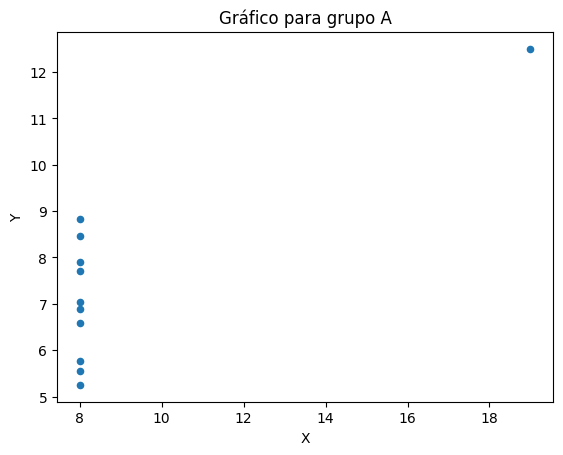

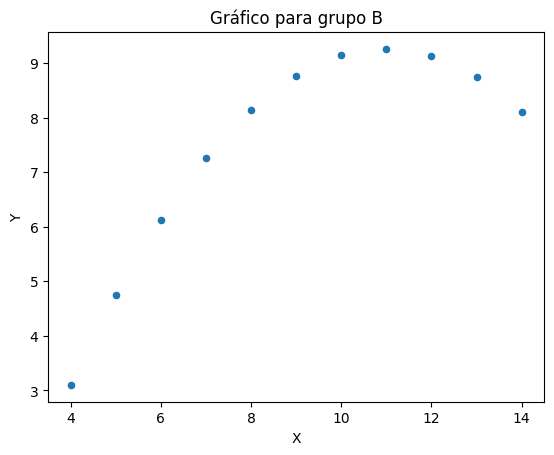

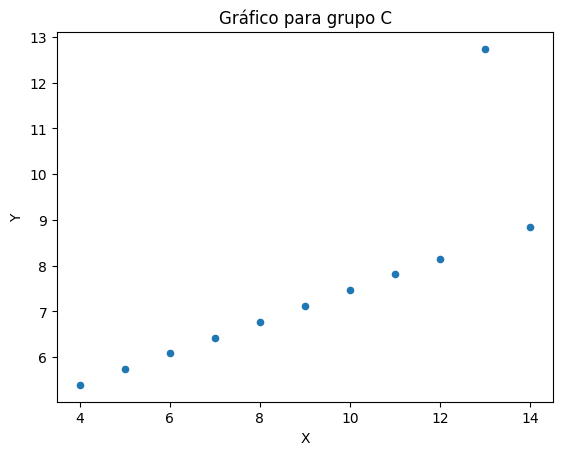

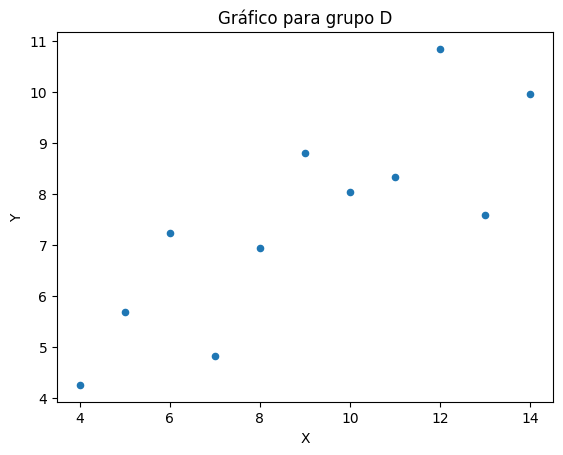

In [ ]:
for name, group in df.groupby('Set'):
    group.plot.scatter(x='X', y='Y', title=f"Gráfico para grupo {name}")

# Análisis con datos eliminados e imputados
Repita los pasos anteriores, esta vez descartando aleatoriamente el 10% de los datos de cada conjunto e imputando sus valores utilizando la media de cada coordenada. Comente sobre las diferencias en los resultados.

In [ ]:
import numpy as np #Es necesario importar la librería random 

def redefinir_df(df):
    # Primero, cremos una lista vacía con los nuevos datos. 
    datos_nuevo_df = []
    # Luego, iteramos sobre cada grupo en el DataFrame.
    for nombre, grupo in df.groupby('Set'):
        print(f"Los indices de las filas del grupo {nombre} son: {grupo.index}")
        # Posteriormente, determinamos cuántas filas eliminar.
        num_filas_eliminar = int(len(grupo) * 0.1)
        # Para continuar, elegimos aleatoriamente las filas a eliminar.
        filas_eliminar = np.random.choice(grupo.index, num_filas_eliminar)
        # Ahora, lo que debemos hacer es eliminar las filas seleccionadas.
        grupo = grupo.drop(filas_eliminar)
        print(f"Se eliminaron {num_filas_eliminar} filas de {nombre}")
        print(f"Las filas eliminadas fueron: {filas_eliminar}")
        # Paso 6
        x_media = grupo['X'].mean()
        y_media = grupo['Y'].mean()
        # Ahora, generamos nuevas filas con los promedios.
        nuevas_filas = pd.DataFrame({
            "Set": [nombre] * num_filas_eliminar,
            "X": [x_media] * num_filas_eliminar,
            "Y": [y_media] * num_filas_eliminar
        })
        # Ahora, concatenamos el grupo original con las nuevas filas.
        grupo = pd.concat([grupo, nuevas_filas])
        # Para finalizar, añadimos el grupo modificado a la lista de nuevos datos.
        datos_nuevo_df.append(grupo)
    # Finalmente, decimos que se retorne el DataFrame concatenado.
    return pd.concat(datos_nuevo_df)


## Estadísticos después de la imputación

In [ ]:
df_imputado = redefinir_df(df)


Los indices de las filas del grupo A son: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')
Se eliminaron 1 filas de A
Las filas eliminadas fueron: [2]
Los indices de las filas del grupo B son: Index([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], dtype='int64')
Se eliminaron 1 filas de B
Las filas eliminadas fueron: [21]
Los indices de las filas del grupo C son: Index([22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], dtype='int64')
Se eliminaron 1 filas de C
Las filas eliminadas fueron: [26]
Los indices de las filas del grupo D son: Index([33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], dtype='int64')
Se eliminaron 1 filas de D
Las filas eliminadas fueron: [42]


In [ ]:
df_imputado.groupby('Set').describe()

X                                               Y                   \
    count mean       std  min  25%  50%   75%   max count   mean       std   
Set                                                                          
A    11.0  9.1  3.300000  8.0  8.0  8.0   8.0  19.0  11.0  7.480  2.029394   
B    11.0  9.4  3.039737  4.0  7.5  9.4  11.5  14.0  11.0  7.777  1.813599   
C    11.0  8.8  3.249615  4.0  6.5  8.8  11.0  14.0  11.0  7.469  2.027819   
D    11.0  9.2  3.249615  4.0  7.0  9.2  11.5  14.0  11.0  7.769  1.826655   

                                         
      min     25%    50%     75%    max  
Set                                      
A    5.25  6.1700  7.040  8.1900  12.50  
B    3.10  7.5185  8.140  8.9500   9.26  
C    5.39  6.2500  7.110  7.8095  12.74  
D    4.26  7.0950  7.769  8.5700  10.84

In [ ]:
for name, group in df_imputado.groupby('Set'):
    print(f'La curtosis de {name} para X es: {group["X"].kurtosis()}')
    print(f'La curtosis de {name} para Y es: {group["Y"].kurtosis()}')

La curtosis de A para X es: 10.703703703703706
La curtosis de A para Y es: 3.262866889922681
La curtosis de B para X es: -0.5396825396825391
La curtosis de B para Y es: 4.296614088453249
La curtosis de C para X es: -0.9427083333333335
La curtosis de C para Y es: 4.601389946310229
La curtosis de D para X es: -0.942708333333333
La curtosis de D para Y es: 0.5174322987287958


## Gráficos de dispersión tras imputación

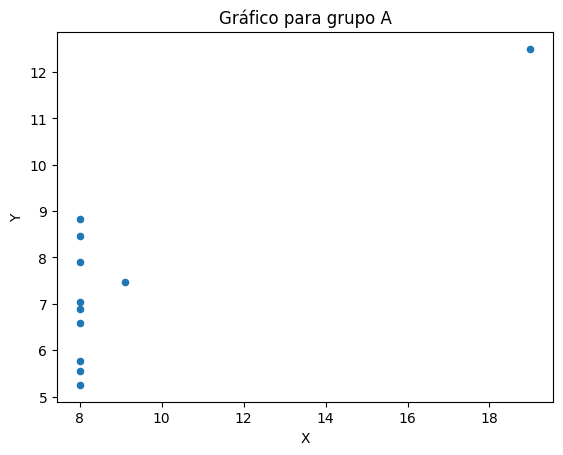

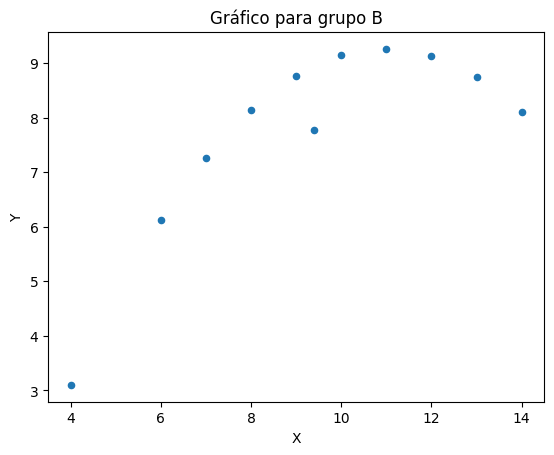

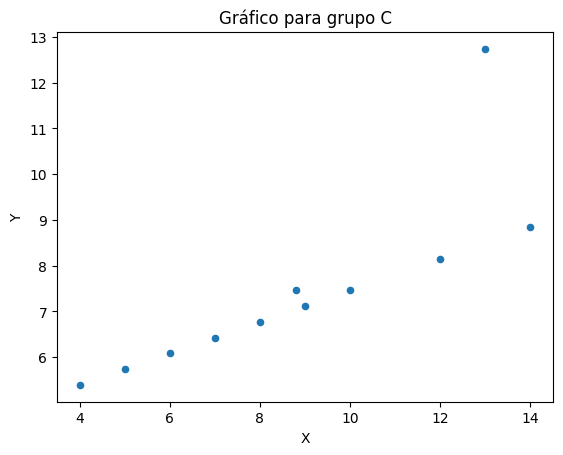

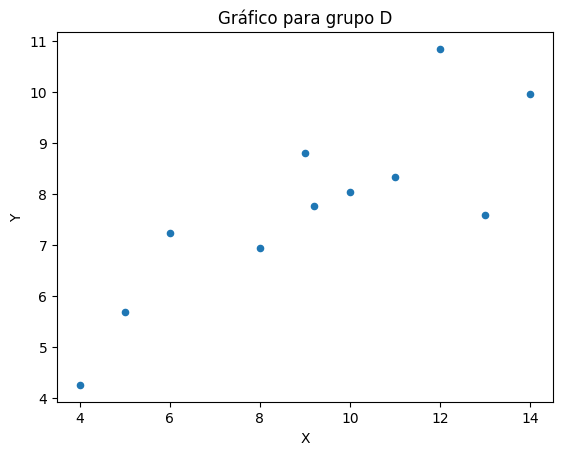

In [ ]:
for name, group in df_imputado.groupby('Set'):
    group.plot.scatter(x='X', y='Y', title=f"Gráfico para grupo {name}")

## Comentario sobre las diferencias
Al eliminar e imputar datos, los estadísticos pueden cambiar ligeramente, especialmente la desviación estándar y la curtosis, que son sensibles a la presencia de valores extremos. Los gráficos de dispersión pueden mostrar menos variabilidad en los puntos imputados, ya que se reemplazan por la media. Esto puede afectar la interpretación de la correlación y la forma de la distribución.